In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt

## Data and EDA

In [221]:
data = pd.read_csv('starcraft_player_data.csv')

In [4]:
data.head(10)

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,52,5,27,10,3000,143.7180,0.003515,0.000220,7,0.000110,0.000392,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0.000000,0.000000
1,55,5,23,10,5000,129.2322,0.003304,0.000259,4,0.000294,0.000432,0.004307,32.9194,42.3454,4.8434,22,0.001193,5,0.000000,0.000208
2,56,4,30,10,200,69.9612,0.001101,0.000336,4,0.000294,0.000461,0.002926,44.6475,75.3548,4.0430,22,0.000745,6,0.000000,0.000189
3,57,3,19,20,400,107.6016,0.001034,0.000213,1,0.000053,0.000543,0.003783,29.2203,53.7352,4.9155,19,0.000426,7,0.000000,0.000384
4,58,3,32,10,500,122.8908,0.001136,0.000327,2,0.000000,0.001329,0.002368,22.6885,62.0813,9.3740,15,0.001174,4,0.000000,0.000019
5,60,2,27,6,70,44.4570,0.000978,0.000255,2,0.000000,0.000000,0.002425,76.4405,98.7719,3.0965,16,0.000372,6,0.000000,0.000000
6,61,1,21,8,240,46.9962,0.000820,0.000169,6,0.000000,0.000045,0.001988,94.0227,90.5311,4.1017,15,0.000573,5,0.000000,0.000000
7,72,7,17,42,10000,212.6022,0.009040,0.000676,6,0.001164,0.001253,0.004952,24.6117,41.7671,6.6104,45,0.002277,9,0.000129,0.000249
8,77,4,20,14,2708,117.4884,0.002944,0.000527,2,0.000019,0.000414,0.005399,52.0140,46.4321,3.3746,29,0.001035,7,0.000273,0.000470
9,81,4,18,24,800,155.9856,0.005054,0.000524,8,0.000025,0.000399,0.003569,24.4632,52.1538,6.5664,27,0.001310,6,0.000000,0.000000


In [4]:
data.shape

(3395, 20)

In [5]:
data.describe()

,GameID,LeagueIndex,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
count,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000
mean,4805.012371,4.184094,117.046947,0.004299,0.000374,4.364654,0.000098,0.000387,0.003463,40.361562,63.739403,5.272988,22.131664,0.001032,6.534021,0.000059,0.000142
std,2719.944851,1.517327,51.945291,0.005284,0.000225,2.360333,0.000166,0.000377,0.000992,17.153570,19.238869,1.494835,7.431719,0.000519,1.857697,0.000111,0.000265
min,52.000000,1.000000,22.059600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000679,6.666700,24.093600,2.038900,5.000000,0.000077,2.000000,0.000000,0.000000
25%,2464.500000,3.000000,79.900200,0.001258,0.000204,3.000000,0.000000,0.000140,0.002754,28.957750,50.446600,4.272850,17.000000,0.000683,5.000000,0.000000,0.000000
50%,4874.000000,4.000000,108.010200,0.002500,0.000353,4.000000,0.000040,0.000281,0.003395,36.723500,60.931800,5.095500,22.000000,0.000905,6.000000,0.000000,0.000020
75%,7108.500000,5.000000,142.790400,0.005133,0.000499,6.000000,0.000119,0.000514,0.004027,48.290500,73.681300,6.033600,27.000000,0.001259,8.000000,0.000086,0.000181
max,10095.000000,8.000000,389.831400,0.043088,0.001752,10.000000,0.003019,0.004041,0.007971,237.142900,176.372100,18.558100,58.000000,0.005149,13.000000,0.000902,0.003084


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3395 entries, 0 to 3394
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   GameID                3395 non-null   int64  
 1   LeagueIndex           3395 non-null   int64  
 2   Age                   3395 non-null   object 
 3   HoursPerWeek          3395 non-null   object 
 4   TotalHours            3395 non-null   object 
 5   APM                   3395 non-null   float64
 6   SelectByHotkeys       3395 non-null   float64
 7   AssignToHotkeys       3395 non-null   float64
 8   UniqueHotkeys         3395 non-null   int64  
 9   MinimapAttacks        3395 non-null   float64
 10  MinimapRightClicks    3395 non-null   float64
 11  NumberOfPACs          3395 non-null   float64
 12  GapBetweenPACs        3395 non-null   float64
 13  ActionLatency         3395 non-null   float64
 14  ActionsInPAC          3395 non-null   float64
 15  TotalMapExplored     

In [12]:
data.tail(10)

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
3385,10079,8,?,?,?,254.2188,0.016608,0.000788,6,0.000926,0.000330,0.005408,14.9191,35.9921,5.7205,28,0.001128,6,0.000000,0.000000
3386,10081,8,?,?,?,339.1524,0.033058,0.001017,10,0.000477,0.000509,0.004609,21.6389,37.1862,6.7103,16,0.001049,3,0.000000,0.000000
3387,10082,8,?,?,?,310.0416,0.026873,0.001278,10,0.000319,0.000479,0.005517,16.5446,33.8174,5.7350,22,0.000922,8,0.000000,0.000000
3388,10083,8,?,?,?,288.7608,0.024022,0.000628,6,0.000350,0.001051,0.005580,19.0108,30.0866,5.3831,30,0.000761,5,0.000000,0.000652
3389,10084,8,?,?,?,151.4046,0.009732,0.000949,6,0.000028,0.000156,0.004363,27.4658,43.8052,4.3312,23,0.000949,6,0.000000,0.000099
3390,10089,8,?,?,?,259.6296,0.020425,0.000743,9,0.000621,0.000146,0.004555,18.6059,42.8342,6.2754,46,0.000877,5,0.000000,0.000000
3391,10090,8,?,?,?,314.6700,0.028043,0.001157,10,0.000246,0.001083,0.004259,14.3023,36.1156,7.1965,16,0.000788,4,0.000000,0.000000
3392,10092,8,?,?,?,299.4282,0.028341,0.000860,7,0.000338,0.000169,0.004439,12.4028,39.5156,6.3979,19,0.001260,4,0.000000,0.000000
3393,10094,8,?,?,?,375.8664,0.036436,0.000594,5,0.000204,0.000780,0.004346,11.6910,34.8547,7.9615,15,0.000613,6,0.000000,0.000631
3394,10095,8,?,?,?,348.3576,0.029855,0.000811,4,0.000224,0.001315,0.005566,20.0537,33.5142,6.3719,27,0.001566,7,0.000457,0.000895


Age, HoursPerWeek, and TotalHours contains some missing values marked as "?", we need to meaure how much missing values we have

In [5]:
missing_count = (data['Age'] == '?').sum()

print("Number of missing values in Age marked as '?':", missing_count)

missing_count = (data['TotalHours'] == '?').sum()

print("Number of missing values in TotalHours marked as '?':", missing_count)

missing_count = (data['HoursPerWeek'] == '?').sum()

print("Number of missing values in HoursPerWeek marked as '?':", missing_count)

Number of missing values in Age marked as '?': 55
Number of missing values in TotalHours marked as '?': 57
Number of missing values in HoursPerWeek marked as '?': 56


In [6]:
## check if there any other features with missing values marked as "?"
missing_values_exist = (data.replace('?', pd.NA).eq('?')).any().any()

if missing_values_exist:
    print("Missing values marked as '?' exist in the DataFrame.")
else:
    print("No missing values marked as '?' found in the DataFrame.")

No missing values marked as '?' found in the DataFrame.


We have different amount of missing values for those three features,since we have over 3000 observations, we can ignore those missing values for now (at least for linear models), we may try to use ML models to handel those missing values. In future, we may consider to impute those values if possible.

In [7]:
columns_to_process = ['Age', 'TotalHours', 'HoursPerWeek']

# Replace "?" with NaN in the specified columns
data[columns_to_process] = data[columns_to_process].replace('?', np.nan)

# Drop rows with missing values in the specified columns
data_no_missing = data.dropna(subset=columns_to_process)

Now convert them to the correct data type(as integer)

In [13]:
# data without missing values, for linear models
data_no_missing.loc[:, columns_to_process] = data_no_missing.loc[:, columns_to_process].astype(int)

Now, we have no missing values

### Data profile

Data profile is generated to get some data information, but I will not run the code here. An HTML file is used to store some EDA.

In [212]:
import pandas_profiling
profile = pandas_profiling.ProfileReport(data)
profile.to_file("data_profile.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 15.46it/s]


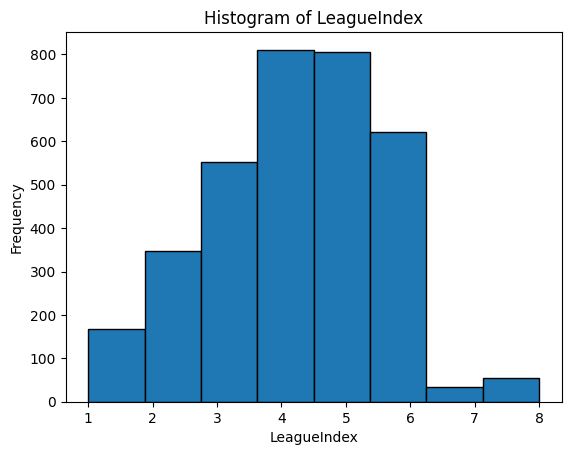

In [226]:
plt.hist(data["LeagueIndex"], bins=8, edgecolor='black')
plt.xlabel('LeagueIndex')
plt.ylabel('Frequency')
plt.title('Histogram of LeagueIndex')
plt.show()

In [14]:
correlation_matrix = data_no_missing.corr()
print(correlation_matrix)

                        GameID  LeagueIndex       Age  HoursPerWeek  \
GameID                1.000000     0.024974  0.088511     -0.025322   
LeagueIndex           0.024974     1.000000 -0.127518      0.217930   
Age                   0.088511    -0.127518  1.000000     -0.184431   
HoursPerWeek         -0.025322     0.217930 -0.184431      1.000000   
TotalHours            0.004178     0.023884 -0.016630      0.024306   
APM                   0.075944     0.624171 -0.210724      0.246897   
SelectByHotkeys       0.070298     0.428637 -0.131105      0.205792   
AssignToHotkeys       0.063915     0.487280 -0.104960      0.158316   
UniqueHotkeys         0.081176     0.322415  0.015119      0.070262   
MinimapAttacks        0.022422     0.270526  0.043100      0.084103   
MinimapRightClicks    0.009898     0.206380 -0.019904      0.049498   
NumberOfPACs          0.035622     0.589193 -0.197128      0.174871   
GapBetweenPACs       -0.065629    -0.537536  0.112106     -0.133838   
Action

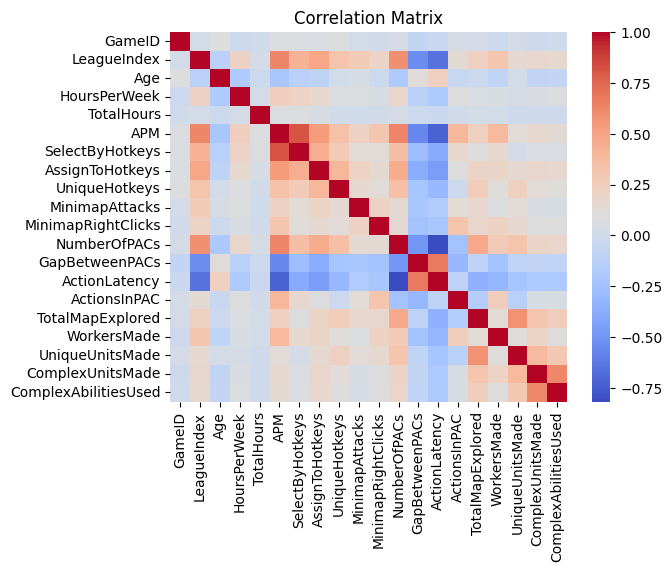

In [17]:
sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Based on the correlation matrix, GapBetweenPACs and ActionLatency has high correlation with APM, Leagueindex, NumberofPACs. Other than that, high correlation between LeagueIndex, APM, SelectedByHotkeys and AssignToHotKeys are observed on the upper left corner. High correlation between ComplexUnitesMade, ComplexAbilitiesUsed and UniqueUnitsMade are observed on the lower right corner.

## Model Fitting

### Linear Model

To valid and test models, a 80-20 train-test split is used on the data set

In [74]:
from sklearn.model_selection import train_test_split
X = data_no_missing.drop('LeagueIndex', axis=1)  # Specify the columns/features used for prediction
y = data_no_missing['LeagueIndex']  # Specify the target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Try linear regression first

In [76]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [77]:
# firt linear regression with all variables

#add constant to predictor variables
x = sm.add_constant(X_train)
#fit linear regression model
model = sm.OLS(y_train, x).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            LeagueIndex   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     166.2
Date:                Sat, 27 May 2023   Prob (F-statistic):               0.00
Time:                        20:14:33   Log-Likelihood:                -3729.4
No. Observations:                2670   AIC:                             7499.
Df Residuals:                    2650   BIC:                             7617.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    3.7086 

Based on the model summary, we have a adj.R-square of 0.54, which means that approximately 54% of the variance in the dependent variable is explained by the independent variables in the linear regression model. The remaining 46% of the variance is unexplained or attributed to other factors not included in the model. We have some feature to be statistically insiginificant like GameID, TotalHours,APM and others. There are strong multicollinearity problems in this model and we will refit model after removing high correlated features and insiginificant features.

Use test set to valid the linear model

In [78]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

In [89]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

def calculate_rmse_mae(actual_values, predicted_values):
    rmse = np.sqrt(mean_squared_error(actual_values, predicted_values))
    mae = mean_absolute_error(actual_values, predicted_values)
    sentence = f"The RMSE is {rmse:.4f} and the MAE is {mae:.4f}."
    return sentence

def calculate_acc(actual_values, predicted_values):
    actual_values = np.round(actual_values)
    acc = np.mean(actual_values == predicted_values)
    return acc

In [80]:
# Calculate RMSE and MAE
result = calculate_rmse_mae(y_test, y_pred)
print("In Testing set", result)
result = calculate_rmse_mae(y_train, y_pred_train)
print("In Training set", result)


In Testing set The RMSE is 1.0050 and the MAE is 0.8159.
In Training set The RMSE is 0.9781 and the MAE is 0.7793.


Round the perdicted LeagueIndex to the nearest integer and calcualte the accuracy

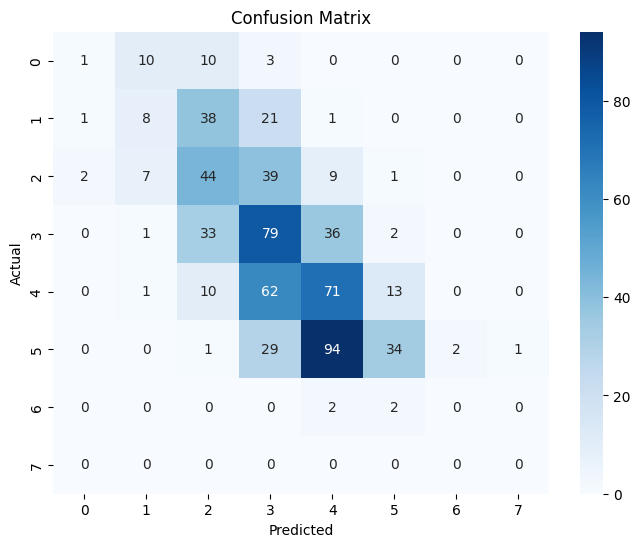

In [84]:
y_pred = np.round(y_pred)
from sklearn.metrics import confusion_matrix
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Calculate Accuracy

In [91]:
# Calculate the accuarcy
acc = calculate_acc(y_pred, y_test)
print("Testing set accuracy:", acc)

acc = calculate_acc(y_pred_train, y_train)
print("Trainingset accuracy:", acc)

Testing set accuracy: 0.35479041916167664
Trainingset accuracy: 0.3970037453183521


Refit the linear regression model by feature selection and removing highly correlated features.

In [92]:
#  Calculate the correlation matrix
correlation_matrix = data.corr()

# Set the correlation threshold
correlation_threshold = 0.8

# Identify highly correlated features
highly_correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            feature_i = correlation_matrix.columns[i]
            feature_j = correlation_matrix.columns[j]
            highly_correlated_features.add(feature_i)
            highly_correlated_features.add(feature_j)

# Remove highly correlated features from the dataset
selected_features = [col for col in data.columns if col not in highly_correlated_features]
filtered_data = data_no_missing[selected_features]

X = filtered_data.drop('LeagueIndex', axis= 1)
y = filtered_data.LeagueIndex

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now performing feature selection
from sklearn.feature_selection import RFE
from sklearn.datasets import make_regression

# Assuming you have your feature matrix X and target variable y

# Create a linear regression object
model = LinearRegression()

# Create an RFE object with the linear regression model and desired number of features
rfe = RFE(estimator=model)

# Perform feature selection
X_selected = rfe.fit_transform(X_train, y_train)

# Get the selected feature indices
selected_feature_indices = rfe.get_support(indices=True)

# Get the selected feature names
selected_feature_names = X.columns[selected_feature_indices]

# Print the coefficients
print("Selected Features:", selected_feature_names)

Selected Features: Index(['AssignToHotkeys', 'UniqueHotkeys', 'MinimapAttacks',
       'MinimapRightClicks', 'WorkersMade', 'ComplexUnitsMade',
       'ComplexAbilitiesUsed'],
      dtype='object')


In [93]:
## refit the linear regression 
X_train_new = X_train[selected_feature_names]
X_test_new = X_test[selected_feature_names]
model = LinearRegression()
model.fit(X_train_new, y_train)
y_pred = model.predict(X_test_new)
y_pred_train = model.predict(X_train_new)

In [94]:
# Calculate RMSE and MAE
result = calculate_rmse_mae(y_test, y_pred)
print("In Testing set", result)
result = calculate_rmse_mae(y_train, y_pred_train)
print("In Training set", result)

In Testing set The RMSE is 1.2145 and the MAE is 0.9982.
In Training set The RMSE is 1.1762 and the MAE is 0.9530.


Calculate the accuracy

In [95]:
# Calculate the accuarcy
acc = calculate_acc(y_pred, y_test)
print("Testing set accuracy:", acc)

acc = calculate_acc(y_pred_train, y_train)
print("Trainingset accuracy:", acc)

Testing set accuracy: 0.281437125748503
Trainingset accuracy: 0.3187265917602996


Linear regression does not perform well in this case, and the model after feature selection shows a worse performance, therefore, we may consider to try different models.
Since the League rank can be considerd as different classes, we may think this question as an classification question, and we will try to use Logistic regression model. 
The nature of the League rank is ordinal, so we use ordinal logistic regression.

### Ordinal Logistic model

In [55]:
# try ordinal logistic model with full data set.
from mord import LogisticAT
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load example dataset
X = data_no_missing.drop('LeagueIndex', axis=1)  # Specify the columns/features used for prediction
y = data_no_missing['LeagueIndex']  # Specify the target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Fit the ordinal logistic regression model
model = LogisticAT()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.33682634730538924


Confusion matrix

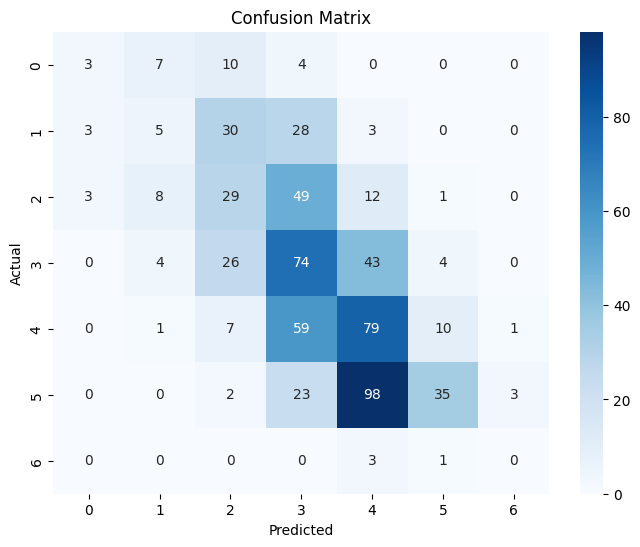

In [65]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [54]:
# try with selected features
X = data_no_missing[selected_feature_names]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Fit the ordinal logistic regression model
model = LogisticAT()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.2619760479041916


The ordinal logistic regression does not perform well, and we only have an accuarcy of 0.336 in this case. Compared with linear regression, the ordinal logistic regression has lower accuracy.

## Random Forest model

In [112]:
from sklearn.ensemble import RandomForestClassifier
X = data_no_missing.drop('LeagueIndex', axis=1)  # Specify the columns/features used for prediction
y = data_no_missing['LeagueIndex'].astype("category")  # Specify the target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [113]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
# Predict on the test set
y_pred = model.predict(X_test)

# Calculate Testing accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Testing accuracy:", accuracy)

# Calculate Training accuracy
y_pred = model.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
print("Training accuracy:", accuracy)

Testing accuracy: 0.41317365269461076
Training accuracy: 1.0


We have a better result in randomforest with testing accuracy of 0.417, but we are facing huge problem of overfitting, where the training accuracy is 1. But we will try to tune hyperparameter to improve the model anyway.

Hyperparameter tunning

In [114]:
from sklearn.model_selection import GridSearchCV
# Define parameter grid for grid search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create Random Forest classifier
rf_model = RandomForestClassifier()

# Perform grid search
grid_search = GridSearchCV(rf_model, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Best Score: 0.41385767790262173


Refit random forest with best parameters

In [213]:
# Get the best estimator
best_rf_model = grid_search.best_estimator_

# Refit the best estimator on the entire dataset
best_rf_model.fit(X_train, y_train)

# Make predictions on the same dataset
y_pred = best_rf_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Testing Accuracy:", accuracy)


# Make predictions on the same dataset
y_pred = best_rf_model.predict(X_train)

# Calculate accuracy
accuracy = accuracy_score(y_train, y_train)
print("Training Accuracy:", accuracy)

Testing Accuracy: 0.39911634756995584
Training Accuracy: 1.0


After tunning the parameter, the randomforest model has testing accuracy of 0.416, but we still have overfitting problem.

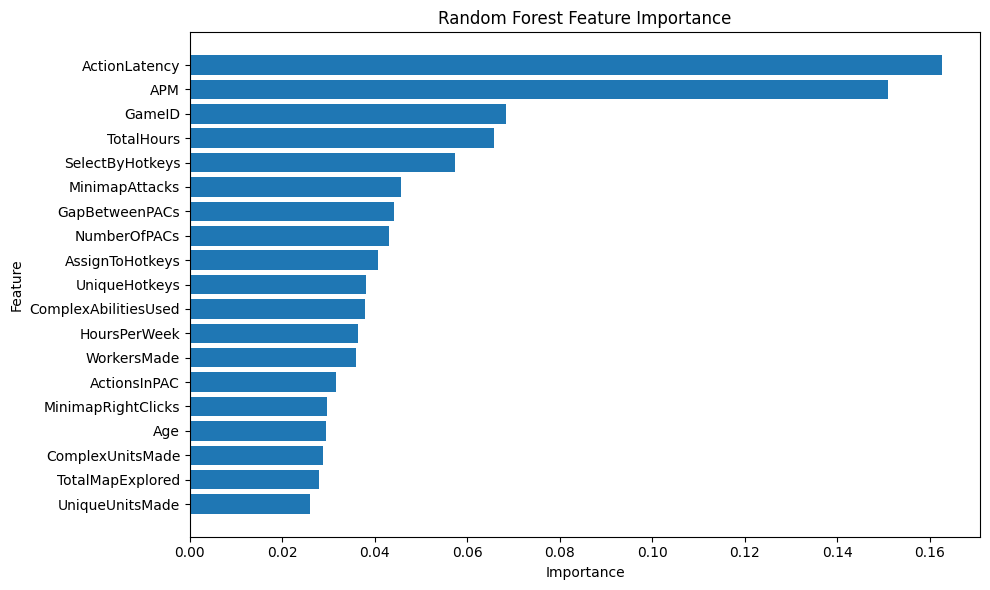

In [217]:
# Get feature importances
importances = best_rf_model.feature_importances_

# Get feature names
feature_names = X_train.columns

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Reverse the order of indices
indices = indices[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(importances)), importances[indices])
plt.yticks(range(len(importances)), feature_names[indices])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance')
plt.tight_layout()
plt.show()

Based on the random forest model, ActionLatency and APM are two most important features.

## XG Boost and Light GBM

XG Boost and LightGBM can handel the missing values, therefore, we use the original data

In [173]:
data.LeagueIndex = data.LeagueIndex.astype("category")
data[columns_to_process] = data[columns_to_process].fillna(-1).astype(int)

In [174]:
data.dtypes

GameID                     int64
LeagueIndex             category
Age                        int32
HoursPerWeek               int32
TotalHours                 int32
APM                      float64
SelectByHotkeys          float64
AssignToHotkeys          float64
UniqueHotkeys              int64
MinimapAttacks           float64
MinimapRightClicks       float64
NumberOfPACs             float64
GapBetweenPACs           float64
ActionLatency            float64
ActionsInPAC             float64
TotalMapExplored           int64
WorkersMade              float64
UniqueUnitsMade            int64
ComplexUnitsMade         float64
ComplexAbilitiesUsed     float64
dtype: object

In [198]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

data.LeagueIndex = label_encoder.fit_transform(data.LeagueIndex)

X = data.drop('LeagueIndex', axis=1)  # Specify the columns/features used for prediction
y = data['LeagueIndex']  # Specify the target variable

unique_values = data.LeagueIndex.unique()
print("LeagueIndex unique values:", unique_values)



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

LeagueIndex unique values: [4 3 2 1 0 6 5 7]


In [196]:
len(unique_values)

8

In [197]:
# Create DMatrix for training and test data
dtrain = xgb.DMatrix(X_train, label=y_train, enable_categorical= True, missing= -1)
dtest = xgb.DMatrix(X_test, label=y_test, enable_categorical= True, missing= -1)

# Define parameters for XGBoost classifier
params = {
    'eta': 0.03,
    'objective': 'multi:softmax',
    'num_class': len(unique_values),
    'eval_metric': 'merror',
    
}

# Train the XGBoost classifier
xgb_model = xgb.train(params, dtrain)

# Make predictions on the test data
y_pred = xgb_model.predict(dtest)

# Convert predicted labels to integers
y_pred = y_pred.astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.34609720176730485


Now, try to tune the hyperparameter for XGboost

In [205]:
from sklearn.model_selection import GridSearchCV

# Assuming 'X' is the feature matrix and 'y' is the target variable
params = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300],
    # Add more parameters to be tuned
}

xgb_model = xgb.XGBClassifier()

grid_search = GridSearchCV(xgb_model, param_grid=params, cv=5)
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}


Refit the model with tunned parameter

In [206]:
# Refit the model with the best parameters
best_xgb_model = xgb.XGBClassifier(**grid_search.best_params_)
best_xgb_model.fit(X_train, y_train)
# Make predictions on the test data using the refitted model
y_pred = best_xgb_model.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Testing accuracy:", accuracy)

# Make predictions on the test data using the refitted model
y_pred = best_xgb_model.predict(X_train)

# Calculate the accuracy score
accuracy = accuracy_score(y_train, y_pred)
print("Training accuracy:", accuracy)

Testing accuracy: 0.39911634756995584
Training accuracy: 0.7919734904270986


We have the XGboost model with testing accuracy of 0.399. There exist a overfitting problem since the training accuracy is much higher.

Draw feature importance plot 

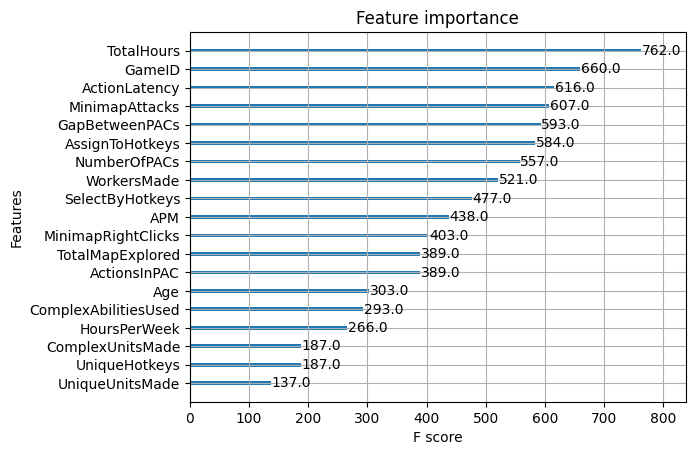

In [207]:
xgb.plot_importance(best_xgb_model)
plt.show()

Based on the feature importance plot, TotalHours is the most important feature. GameID should be independent from the LeagueIndex, but it is the important in XGboost model.

## Summary

The XGboost and Random forest model have best performance. They have testing accuracy around 0.4. Linear models include linear regression and Logistic model can not predict the LeagueIndex well.
Both Random Forest and XGboost have overfitting problem.  
\
We may consider to use either Random Forest or XGboot in this case, but random forest can be trained and tuned in parallel, and XGboost is more time consuming. We have a relative small data set, thus random forest can handel it well. If a bigger data set is given, we may prefer the XGboost model.
\
\
The XGboost also has ability to handel missing values, therefore, if the future data contain more missing values, we may prefer XGboost.

## Communicate findings to non-technical stakeholder.

First, most of players has LeagueIndex betwen 2 to 5. We have smaller propotion of high rank players( LeagueIndex > 5).

Then move to the model part.
Given the data set, we are able to predict with accuracy of 40%. Based on our machine learning models, some important features are listed which may be helpul. 

Action per minute, Mean latency from the onset of a PACs to their first action in milliseconds(ActionLatency), Total hours are important features to predict player's rank. 
\
We may consider to use Machine learning models(XGboost or Rnadom Forest) to predict player's rank due to the better performance. 

We may be able to generate a better prediction result by having larger data set in future, and we may also try some other methods(svm, neural nets) in future.

## Hypothetical: 
after seeing your work, your stakeholders come to you and say that they
can collect more data, but want your guidance before starting. How would you advise
them based on your EDA and model results?

Based on the current data, we have some missing values in Age, TotalHours, and HoursPerWeek. Try to aviod missing values if possible, and this should be able to help training a better model.
\
\
Consider the quality and reliability of the additional data that can be collected. Ensure that the data collection process adheres to proper protocols and standards to minimize errors and biases.
\
\
Focus on high-impact variables: Prioritize the collection of data for variables that have demonstrated high importance with the LeagueIndex(APC, ActionLatency, and TotalHours).
\
\
Consider diversity in data: Our data is not balanced now due to the lack of high rank players, we should collect data from a more diverse range of sources or target specific segments of the population to ensure a representative dataset. 
\
However, the lack of high rank player may reflect the true nature of the population data distribution, thus we should try to collect more data to observe the distribution again and double check on higher rank player's distribution.
\
\
Incremental data collection: If feasible, collect additional data incrementally and iteratively. This approach allows for continuous model improvement and evaluation